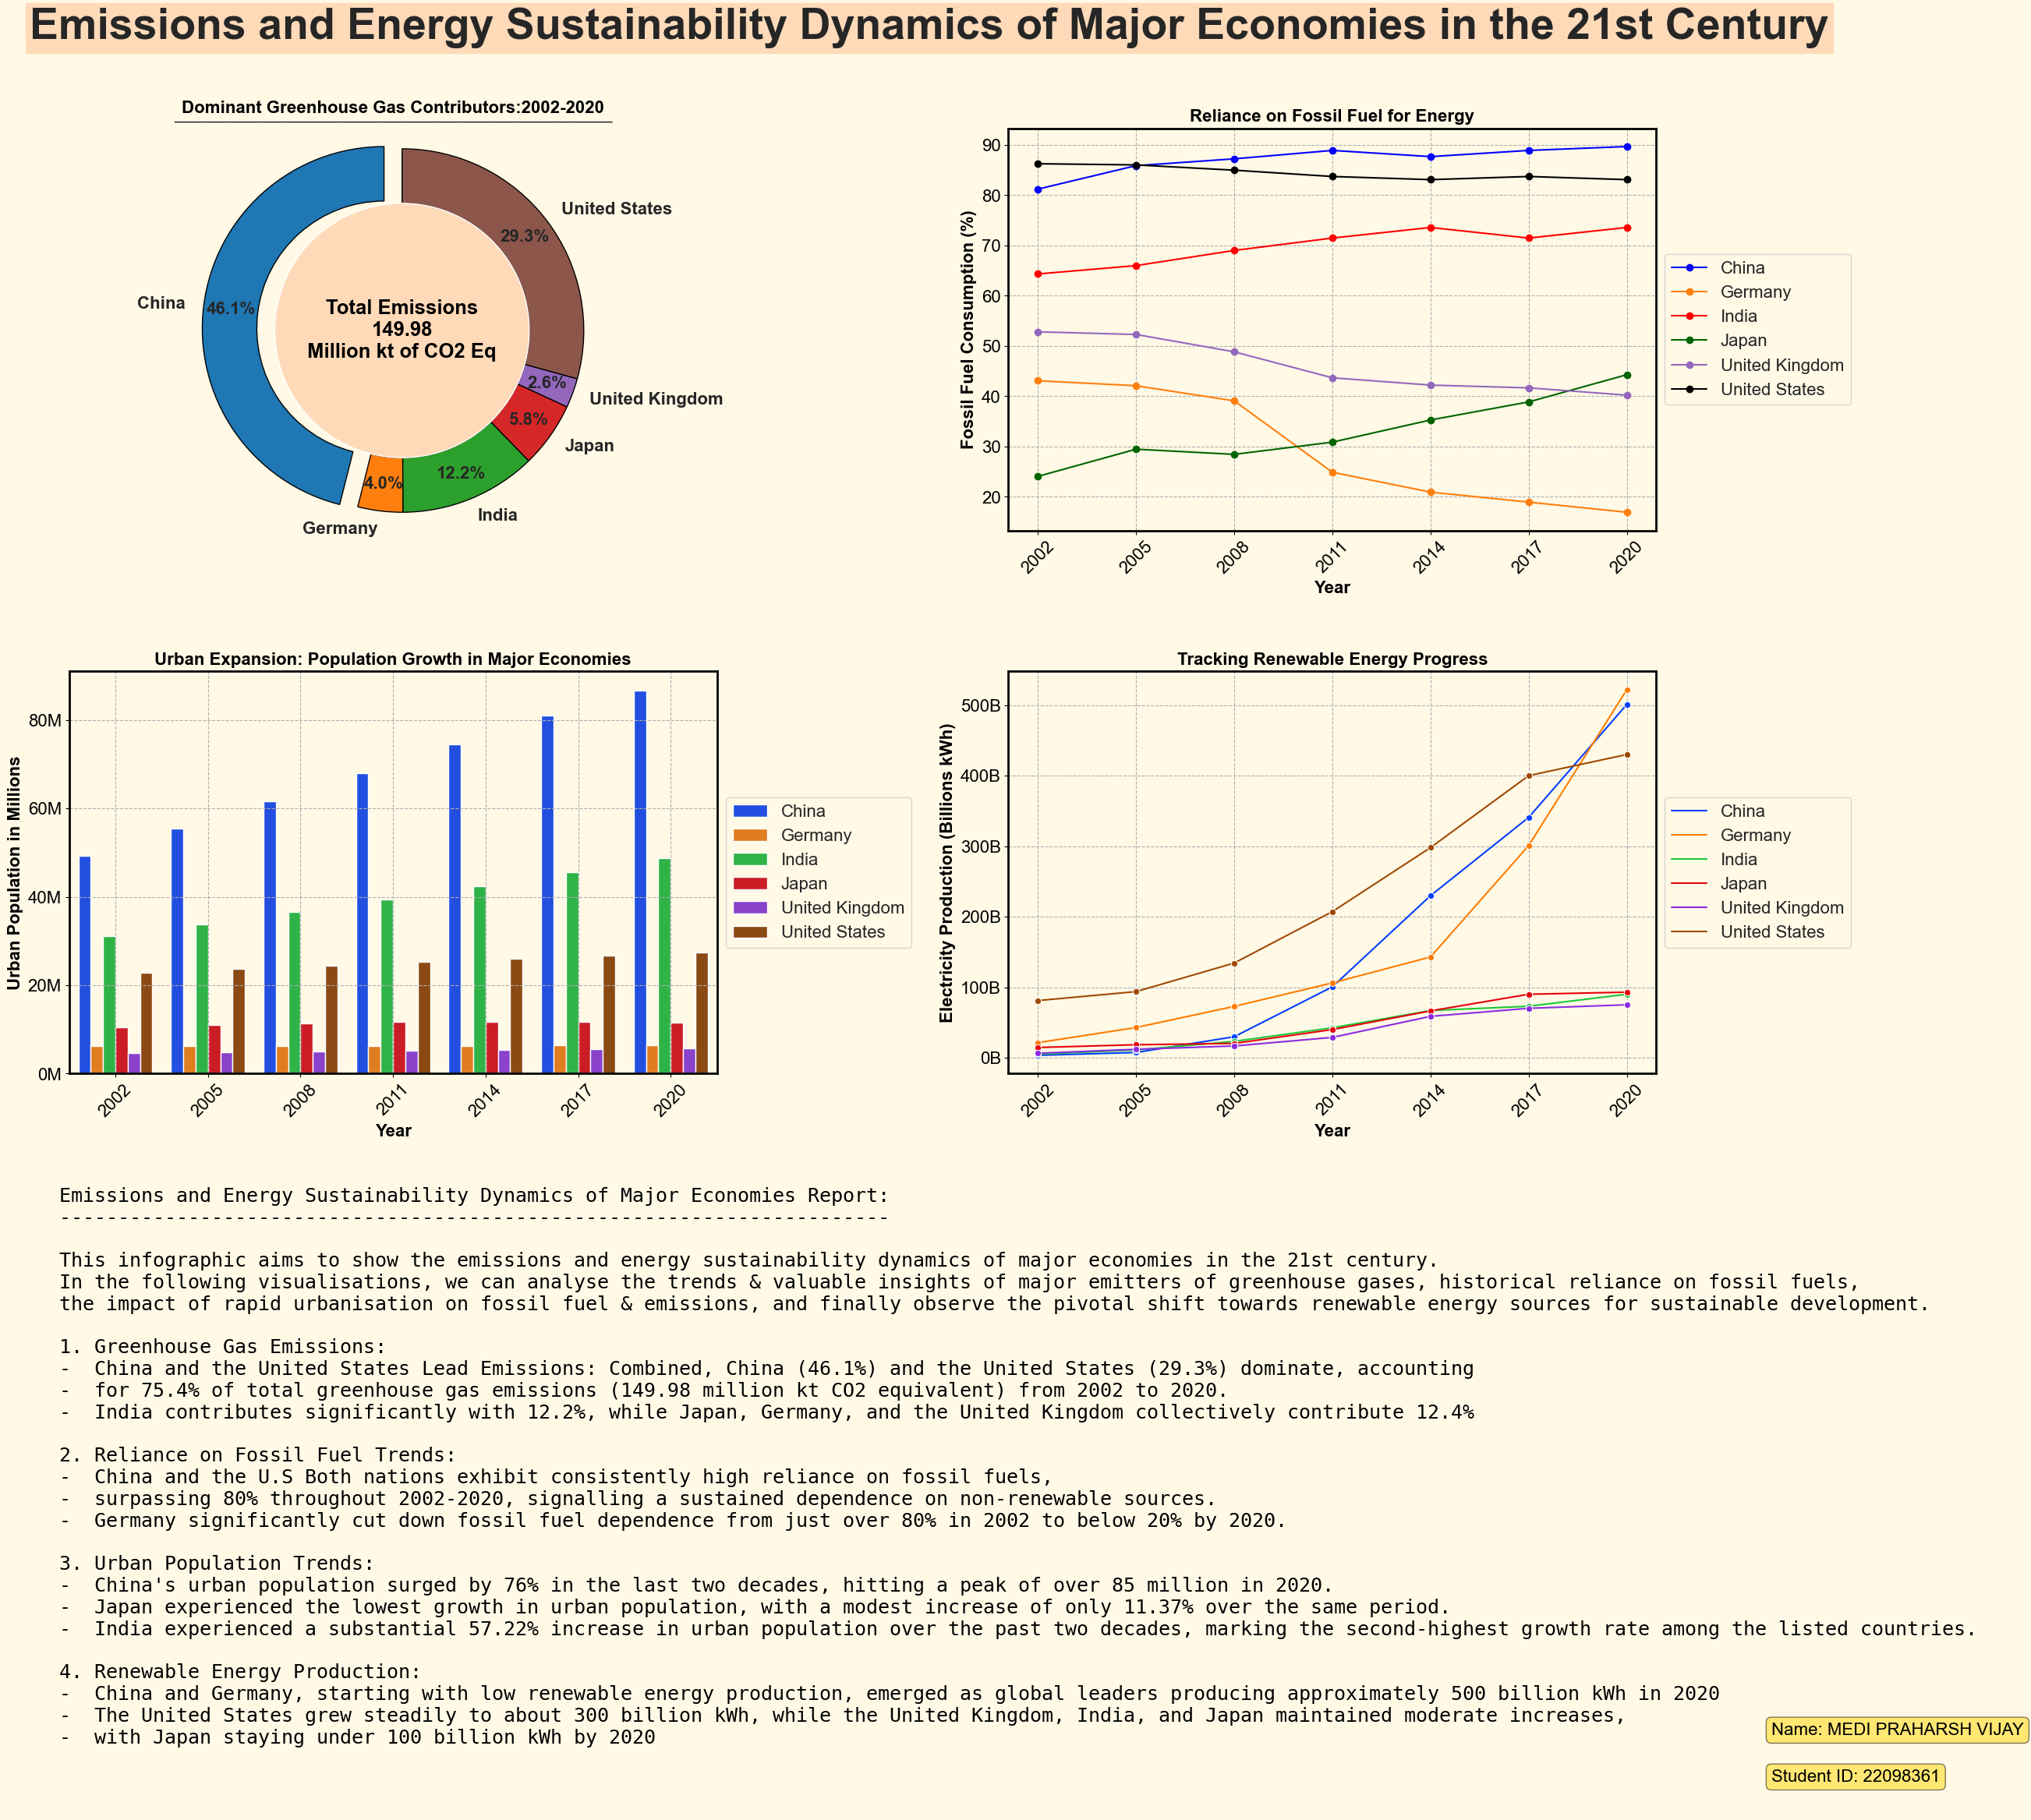

In [1]:

"""
Created on Sat Jan  6 18:30:52 2024

@author: Medi praharsh vijay
"""

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Circle


def load_data(filename):
    """
    Load the data from a CSV file, clean and transpose it.
    """
    data = pd.read_csv(filename)
    copy_data = data.copy()
    data_countries = copy_data.drop(["Indicator"], axis=1).dropna().fillna(0)
    data_years = data_countries.transpose()
    return data, data_countries, data_years


def set_subplot_background(ax, color):
    """Set the background color of the subplot."""
    ax.set_facecolor(color)


def urban_population(data, countries, indicator_name, years, ax):
    ''' Create a function to acheive a line plot to visualize Urban population
        for top 6 economies over 2 decades using groupby method

    Parameters:
    - data : The input DataFrame containing data.
    - countries : A list of country names to be selected in the plot.
    - indicator_name : A list of indicator names to filter the data.
    - years : A list of years to include in the plot.'''

    # Add Grid Style
    sns.set_theme(style="darkgrid")

    # Filter the data for the selected countries, Indicators and years
    data_filtered = data[(data['Country Name'].isin(countries)) &
                         (data['Indicator'].isin(indicator_name))][['Country Name'] + years].fillna(0)

    # Convert values to billions & reset the index
    data_filtered[years] = data_filtered[years] / 1e7
    data_arrange = data_filtered.groupby('Country Name').sum().reset_index()

    # Prepare the DataFrame to make it suitable for plotting
    data_prepared = data_arrange.melt(
        id_vars='Country Name', var_name='Year', value_name='Urban Population')

    # Create a bar plot
    sns.barplot(ax=ax, x='Year', y='Urban Population',
                hue='Country Name', data=data_prepared, palette="bright")

    # Add Title & Labels
    ax.set_title('Urban Expansion: Population Growth in Major Economies',
                 fontsize=16, color='black', weight='bold')
    ax.set_xlabel('Year', fontsize=16, color='black', weight='bold')
    ax.set_ylabel('Urban Population in Millions',
                  fontsize=16, color='black', weight='bold')

    # Add rotation and ticks
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='both', which='both', labelsize=16)
    
    # Format the y-axis in billions
    ax.yaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, pos: f'{x:.0f}M'))

    # Add Legends
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), facecolor='#fff9e6', fontsize=16)

    # Add background colour
    set_subplot_background(ax, '#fff9e6')


def Green_emission(data, selected_countries, selected_indicator, years, ax):
    """
    Filter the data based on selected countries, indicators, and years,
    then plot a pie chart based on the emission data.

    Parameters:
    - data : The input DataFrame containing emission data.
    - selected_countries : A list of country names to be selected.
    - selected_indicator : A list of indicator names to filter the data.
    - years: A list of years to include in the plot.
    """

    # Filter the data for the selected countries, Indicators and years
    data_filtered = data[(data['Country Name'].isin(selected_countries)) &
                         (data['Indicator'].isin(selected_indicator))][['Country Name'] + years].fillna(0)
    data_filtered["Total Greenhouse emissions"] = data_filtered[years].sum(
        axis=1)

    # Calculating total emission for centre circle
    total_emission = data_filtered["Total Greenhouse emissions"].sum()
    emission_data = data_filtered.drop(years, axis=1)

    # Add colours for the plot
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

    #colors = ['#FF6666', '#FFCC66', '#66B2FF', '#66FF66', '#FF6666', '#999999']
    explode = (0.1, 0., 0, 0, 0, 0)
    wedgeprops = dict(width=0.3, edgecolor='black')
    wedges, texts, autotexts = ax.pie(emission_data['Total Greenhouse emissions'],
                                      labels=emission_data['Country Name'],
                                      autopct=lambda p: '{:.1f}%'.format(p)
                                      if p > 1 else '', pctdistance=0.85,
                                      startangle=90, colors=colors,
                                      explode=explode, wedgeprops=wedgeprops,textprops=dict(fontsize=16, weight='bold'))
    
    # convert values to million for center circle & Title
    centre_circle = Circle((0, 0), 0.70, fc='#ffdab9')
    ax.add_patch(centre_circle)
    ax.text(0, 0, f'Total Emissions\n{total_emission / 1e6:.2f}\nMillion kt of CO2 Eq',
            ha='center', va='center', fontsize=18.5, fontweight='bold', color='black')
    ax.axis('equal')

    # Add Title
    ax.set_title("Dominant Greenhouse Gas Contributors:2002-2020",
             fontsize=16, color='black', weight='bold')
    title_text = ax.title.get_text()
    ax.title.set_text('')
    ax.text(0.5, 1.05, title_text, fontsize=16, color='black', weight='bold',
        ha='center', va='center', transform=ax.transAxes, linespacing=2)
    ax.text(0.5, 1.03, '_' * 60, color='black', ha='center', va='center', transform=ax.transAxes)

    # Add background colour
    set_subplot_background(ax, '#fff9e6')

def fossil_fuel(data, countries, indicator_name, years, ax):
    """Filter the data based on selected countries, indicators, and years,
    then plot a line chart based on the fossil fuel data.

    Parameters:
    - data : The input DataFrame containing emission data.
    - selected_countries : A list of country names to be selected.
    - selected_indicator : A list of indicator names to filter the data.
    - years: A list of years to include in the plot."""
    
    # Set custom color palette
    custom_palette = ['#0000FF', '#ff7f0e', '#FF0000', '#006400', '#9467bd', '#000000']
    
    data_filtered = data[(data['Country Name'].isin(countries)) &
                         (data['Indicator'] == indicator_name)][['Country Name'] + years].fillna(0)
    data_prepared = data_filtered.set_index('Country Name').T
    
    # Create line plot with custom colors
    data_prepared.plot(kind='line', marker='o', color=custom_palette, ax=ax)
    
    # Add Title & labels
    ax.set_title('Reliance on Fossil Fuel for Energy',
                 fontsize=16, weight='bold')
    ax.set_ylabel('Fossil Fuel Consumption (%)', fontsize=16, weight='bold')
    ax.set_xlabel('Year', fontsize=16, color='black', weight='bold')
    
    # Add rotation & ticks
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='both', which='both', labelsize=16)
    
    # Add Legends
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), facecolor='#fff9e6', fontsize=16)
    
    # Add background color
    set_subplot_background(ax, '#fff9e6')


def renewable_energy(data, countries, indicator_name, years, ax):
    """Filter the data based on selected countries, indicators, and years,
    then plot a line chart based on the renewable energy data.

    Parameters:
    - data : The input DataFrame containing emission data.
    - selected_countries : A list of country names to be selected.
    - selected_indicator : A list of indicator names to filter the data.
    - years: A list of years to include in the plot."""
    
    # Filter the data for the selected countries, Indicators and years
    data_filtered = data[(data['Country Name'].isin(countries)) &
                         (data['Indicator'].isin(indicator_name))][['Country Name'] + years].fillna(0)
    
    #Convert values to billions 
    data_filtered[years] = data_filtered[years] / 1e9
    
    # prepare the datafram for plotting
    data_prepared = data_filtered.melt(id_vars='Country Name', var_name='Year',
                                       value_name='Electricity production from renewable sources')
    
    sns.lineplot(ax=ax, x='Year', y='Electricity production from renewable sources',
                 hue='Country Name', data=data_prepared, marker='o',palette='bright')
    
    # Add Title & labels
    ax.set_title('Tracking Renewable Energy Progress',
                 fontsize=16, color='black', weight='bold')
    ax.set_xlabel('Year', fontsize=16, color='black', weight='bold')
    ax.set_ylabel('Electricity Production (Billions kWh)', fontsize=16, color='black', weight='bold')
    
    # Add rotation & ticks
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='both', which='both', labelsize=16)

    
    # Format the y-axis in billions
    ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{x:.0f}B'))
    
    # Add Legends
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), facecolor='#fff9e6', fontsize=16)
    
    # Add background colour
    set_subplot_background(ax, '#fff9e6')
    ax.grid(True)


if __name__ == '__main__':
    
    filepath = '/Users/vijaym/Desktop/Desktop/dhv/Assignment_data2.csv'
    data, data_countries, data_years = load_data(filepath)

    # Subplots Figures Size
    fig, axs = plt.subplots(2, 2, figsize=(24, 15))

    #  calling the Plotting functions
    years_for_plot = ['2002', '2005',
                      '2008', '2011', '2014', '2017', '2020']
    selected_countries = ['China', 'United States',
                          'India', 'Japan', "Germany", "United Kingdom"]
    urban_population(data, selected_countries, [
                     "Urban population"], years_for_plot, axs[1, 0])
    Green_emission(data, selected_countries, [
        "Total greenhouse gas emissions (kt of CO2 equivalent)"], years_for_plot, axs[0, 0])
    renewable_energy(data, selected_countries, [
        "Electricity production from renewable sources, excluding hydroelectric (kWh)"], years_for_plot, axs[1, 1])
    fossil_fuel(data, selected_countries,
                "Fossil fuel energy consumption (% of total)", years_for_plot, axs[0, 1])

    # Main title and background color
    plt.suptitle("Emissions and Energy Sustainability Dynamics of Major Economies in the 21st Century",
                 fontsize=40, weight='bold', backgroundcolor='#ffdab9')
    # fig.set_facecolor('#fff9e6')

    # Report text and author information
    report_text = """
    Emissions and Energy Sustainability Dynamics of Major Economies Report:
    -----------------------------------------------------------------------
    
    This infographic aims to show the emissions and energy sustainability dynamics of major economies in the 21st century. 
    In the following visualisations, we can analyse the trends & valuable insights of major emitters of greenhouse gases, historical reliance on fossil fuels,
    the impact of rapid urbanisation on fossil fuel & emissions, and finally observe the pivotal shift towards renewable energy sources for sustainable development.

    1. Greenhouse Gas Emissions:
    -  China and the United States Lead Emissions: Combined, China (46.1%) and the United States (29.3%) dominate, accounting 
    -  for 75.4% of total greenhouse gas emissions (149.98 million kt CO2 equivalent) from 2002 to 2020.
    -  India contributes significantly with 12.2%, while Japan, Germany, and the United Kingdom collectively contribute 12.4%

    2. Reliance on Fossil Fuel Trends:
    -  China and the U.S Both nations exhibit consistently high reliance on fossil fuels,
    -  surpassing 80% throughout 2002-2020, signalling a sustained dependence on non-renewable sources.
    -  Germany significantly cut down fossil fuel dependence from just over 80% in 2002 to below 20% by 2020.

    3. Urban Population Trends:
    -  China's urban population surged by 76% in the last two decades, hitting a peak of over 85 million in 2020.
    -  Japan experienced the lowest growth in urban population, with a modest increase of only 11.37% over the same period.
    -  India experienced a substantial 57.22% increase in urban population over the past two decades, marking the second-highest growth rate among the listed countries.

    4. Renewable Energy Production:
    -  China and Germany, starting with low renewable energy production, emerged as global leaders producing approximately 500 billion kWh in 2020
    -  The United States grew steadily to about 300 billion kWh, while the United Kingdom, India, and Japan maintained moderate increases,
    -  with Japan staying under 100 billion kWh by 2020 

       
    """
    # Add overall background color
    fig.set_facecolor('#fff9e6')
    
    # Add grid lines to each subplot
    for ax in axs.flatten():
        ax.grid(True, linestyle='--', alpha=1)

    # Adjust layout for the report
    fig.text(0.01, -0.01, report_text, fontsize=18, ha='left',
             va='top', fontfamily='monospace', color='black')
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Grid box for student information
    author_box = dict(boxstyle='round', facecolor='#FFD700',
                      alpha=0.5, edgecolor='black')
    plt.text(0.95, -0.50, "Name: MEDI PRAHARSH VIJAY", transform=fig.transFigure,
             ha="left", va="bottom", fontsize=16, color='black', bbox=author_box)
    plt.text(0.95, -0.54, "Student ID: 22098361", transform=fig.transFigure,
             ha="left", va="bottom", fontsize=16, color='black', bbox=author_box)

    # Set subplot borders to black color
    for ax in axs.flatten():
        for spine in ax.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(2)

    # Increase the gap between subplots
    plt.subplots_adjust(wspace=0.45, hspace=0.35)

    plt.savefig('22098361.png', dpi=300, bbox_inches='tight')
    plt.show()

